# Cylindrical gravitational waves with two degrees of freedom - An exact solution by Piran,  Safier & Katz
##  Geoff Cope
##  Univeristy of Utah
##  December 28, 2021

Here we derive the field equations for metric 5 known as the Jordan Ehlers Kundt Kompaneets metric.  There seems to be some sort of error when solving for one of the constraint equations.  See last cell, find out why!

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.34.331

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
T,R,Phi,Z,dT,dR,dPhi,dZ = symbols( 'T R Phi Z dT dR dPhi dZ' ) 

In [5]:
Psi = Function('Psi')(R,T)
Psi

In [6]:
Omega = Function('Omega')(R,T)
Omega

In [7]:
gamma = Function('gamma')(R,T)
gamma

In [8]:
variables = Matrix( [T,R,Phi,Z] )
variables

⎡T⎤
⎢ ⎥
⎢R⎥
⎢ ⎥
⎢Φ⎥
⎢ ⎥
⎣Z⎦

In [9]:
differentials = Matrix( [dT,dR,dPhi,dZ] ) 
differentials

⎡ dT ⎤
⎢    ⎥
⎢ dR ⎥
⎢    ⎥
⎢dPhi⎥
⎢    ⎥
⎣ dZ ⎦

In [12]:
lineElement = expand( exp(2*(gamma-Psi)) * (dT**2 - dR**2) - exp(2*Psi) * (dZ + Omega * dPhi)**2 - R**2 * exp(-2*Psi) * dPhi**2 )
lineElement

In [13]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ -2⋅Ψ(R, T)  2⋅γ(R, T)                                                                     
⎢ℯ          ⋅ℯ                      0                               0                       
⎢                                                                                           
⎢                          -2⋅Ψ(R, T)  2⋅γ(R, T)                                            
⎢          0             -ℯ          ⋅ℯ                             0                       
⎢                                                                                           
⎢                                                    2  -2⋅Ψ(R, T)    2        2⋅Ψ(R, T)    
⎢          0                        0             - R ⋅ℯ           - Ω (R, T)⋅ℯ           -Ω
⎢                                                                                           
⎢                                                                    2⋅Ψ(R, T)              
⎣          0                        0                      -Ω(R, T)⋅ℯ 

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡ -2⋅Ψ(R, T)  2⋅γ(R, T)                                                                     
⎢ℯ          ⋅ℯ                      0                               0                       
⎢                                                                                           
⎢                          -2⋅Ψ(R, T)  2⋅γ(R, T)                                            
⎢          0             -ℯ          ⋅ℯ                             0                       
⎢                                                                                           
⎢                                                    2  -2⋅Ψ(R, T)    2        2⋅Ψ(R, T)    
⎢          0                        0             - R ⋅ℯ           - Ω (R, T)⋅ℯ           -Ω
⎢                                                                                           
⎢                                                                    2⋅Ψ(R, T)              
⎣          0                        0                      -Ω(R, T)⋅ℯ 

In [16]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("T R Phi Z")
T,R,Phi,Z = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡  ∂             ∂              ∂             ∂                                            
⎢⎢- ──(Ψ(R, T)) + ──(γ(R, T))  - ──(Ψ(R, T)) + ──(γ(R, T))                                  
⎢⎢  ∂T            ∂T             ∂R            ∂R                                           
⎢⎢                                                                                          
⎢⎢  ∂             ∂              ∂             ∂                                            
⎢⎢- ──(Ψ(R, T)) + ──(γ(R, T))  - ──(Ψ(R, T)) + ──(γ(R, T))                                  
⎢⎢  ∂R            ∂R             ∂T            ∂T                     

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                 ∂         
⎢    2                           2     2              2              2            ──(Ψ(R, T)
⎢   ∂               ⎛∂          ⎞     ∂              ∂              ∂             ∂R        
⎢- ───(Ψ(R, T)) - 2⋅⎜──(Ψ(R, T))⎟  + ───(Ψ(R, T)) + ───(γ(R, T)) - ───(γ(R, T)) - ──────────
⎢    2              ⎝∂T         ⎠      2              2              2                 R    
⎢  ∂R                                ∂T             ∂R             ∂T                       
⎢                                                                                           
⎢                                                                                           
⎢                                                          ∂              4⋅Ψ(R, T) ∂       
⎢                                                          ──(γ(R, T))

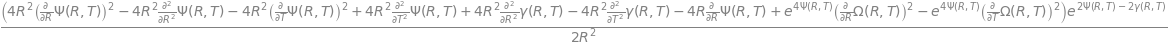

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                 ∂         
⎢    2                           2     2              2              2            ──(Ψ(R, T)
⎢   ∂               ⎛∂          ⎞     ∂              ∂              ∂             ∂R        
⎢- ───(Ψ(R, T)) - 2⋅⎜──(Ψ(R, T))⎟  + ───(Ψ(R, T)) + ───(γ(R, T)) - ───(γ(R, T)) - ──────────
⎢    2              ⎝∂T         ⎠      2              2              2                 R    
⎢  ∂R                                ∂T             ∂R             ∂T                       
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

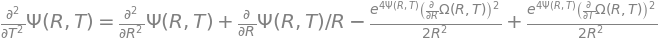

In [45]:
fieldEquation1 = Eq( diff(Psi,T,T) , expand( solve( Ric.tensor()[3,3], diff(Psi,T,T) )[0] ) )
fieldEquation1

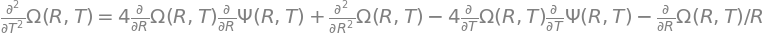

In [56]:
fieldEquation2 = Eq( diff(Omega,T,T) , expand(solve( Ric.tensor()[2,2], diff(Omega,T,T) )[0].subs(fieldEquation1.args[0],fieldEquation1.args[1])) )
fieldEquation2

In [26]:
fieldEquation3 = Eq(diff(gamma,T) , solve( Ric.tensor()[1,0] , diff(gamma,T) )[0] ) 
fieldEquation3

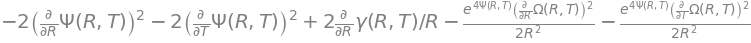

In [37]:
fieldEquation4 =  Ric.tensor()[0,0] + Ric.tensor()[1,1]
fieldEquation4

In [59]:
vacuumFieldEquations = Matrix([fieldEquation1,fieldEquation2,fieldEquation3,fieldEquation4])
vacuumFieldEquations

⎡                                                                          2                
⎢                                    ∂              4⋅Ψ(R, T) ⎛∂          ⎞     4⋅Ψ(R, T) ⎛∂
⎢        2              2            ──(Ψ(R, T))   ℯ         ⋅⎜──(Ω(R, T))⎟    ℯ         ⋅⎜─
⎢       ∂              ∂             ∂R                       ⎝∂R         ⎠               ⎝∂
⎢      ───(Ψ(R, T)) = ───(Ψ(R, T)) + ─────────── - ───────────────────────── + ─────────────
⎢        2              2                 R                      2                          
⎢      ∂T             ∂R                                      2⋅R                         2⋅
⎢                                                                                           
⎢                                                                                           
⎢        2                                          2                                       
⎢       ∂               ∂           ∂              ∂               ∂  

I have no idea why I'm getting the following error.  Solve worked fine for the time derivative of gamma and now it won't work for the R derivative of gamma.  Find out why

In [57]:
solve( fieldEquation4, diff(gamma,R))

ValueError: Dimension of index greater than rank of array